# Artificial Neural Networks with Keras

# Setup

In [2]:
import tensorflow as tf

C:\Users\youss\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\youss\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\youss\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\youss\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
import numpy as np
import os

In [4]:
np.random.seed(42)

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
tf.__version__

'1.14.0'

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

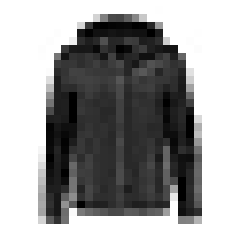

In [13]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [14]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Coat'

In [17]:
X_valid.shape

(5000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

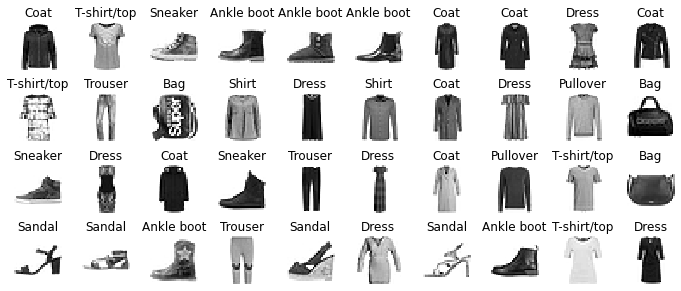

In [19]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [23]:
model.layers

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [26]:
model.get_layer(hidden1.name) is hidden1

True

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
weights

array([[-0.00142156, -0.05712541,  0.05696686, ..., -0.0530748 ,
        -0.05698236, -0.04785424],
       [-0.01647522,  0.03621194,  0.03786058, ..., -0.06936003,
        -0.00380585,  0.07091977],
       [-0.03744379,  0.05769715, -0.0185867 , ...,  0.04988699,
        -0.00939578, -0.04363542],
       ...,
       [ 0.0732695 ,  0.00377951, -0.06221029, ..., -0.02971619,
         0.03698807, -0.05954434],
       [-0.0520997 , -0.04069188, -0.0078989 , ..., -0.05081922,
        -0.04860814, -0.04239721],
       [-0.05399474,  0.013739  ,  0.06714898, ...,  0.07183146,
        -0.0142822 , -0.00517034]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Train the model

In [33]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 22s 404us/sample - loss: 0.7314 - acc: 0.7617 - val_loss: 0.5090 - val_acc: 0.8270
Epoch 2/30
55000/55000 [==============================] - 14s 247us/sample - loss: 0.4929 - acc: 0.8294 - val_loss: 0.4569 - val_acc: 0.8434
Epoch 3/30
55000/55000 [==============================] - 16s 284us/sample - loss: 0.4480 - acc: 0.8432 - val_loss: 0.4124 - val_acc: 0.8584
Epoch 4/30
55000/55000 [==============================] - 14s 250us/sample - loss: 0.4212 - acc: 0.8521 - val_loss: 0.4063 - val_acc: 0.8628
Epoch 5/30
55000/55000 [==============================] - 15s 266us/sample - loss: 0.4000 - acc: 0.8598 - val_loss: 0.3810 - val_acc: 0.8668
Epoch 6/30
55000/55000 [==============================] - 14s 253us/sample - loss: 0.3839 - acc: 0.8651 - val_loss: 0.3762 - val_acc: 0.8676
Epoch 7/30
55000/55000 [==============================] - 15s 270us/sample - loss: 0.3692 - acc: 0.8696 -

In [34]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': None,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [35]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [36]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Plot learning Curves

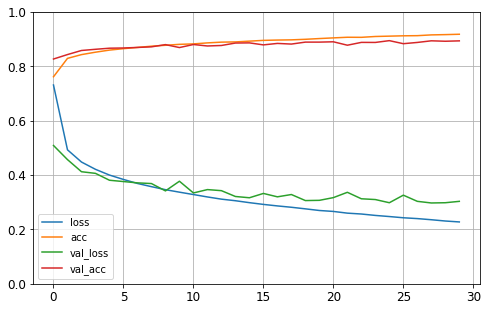

In [37]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 212us/sample - loss: 0.3348 - acc: 0.8846


[0.3348216321468353, 0.8846]

In [39]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [40]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [42]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

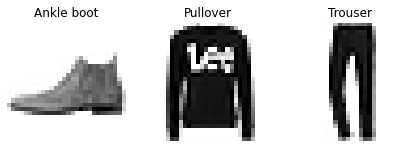

In [43]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Question 1 :

In [44]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [45]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 19s 342us/sample - loss: 0.3798 - acc: 0.8616 - val_loss: 0.3710 - val_acc: 0.8656
Epoch 2/30
55000/55000 [==============================] - 21s 379us/sample - loss: 0.3317 - acc: 0.8779 - val_loss: 0.3191 - val_acc: 0.88509 - acc: 0 -
Epoch 3/30
55000/55000 [==============================] - 22s 405us/sample - loss: 0.3091 - acc: 0.8855 - val_loss: 0.3389 - val_acc: 0.8794
Epoch 4/30
55000/55000 [==============================] - 17s 314us/sample - loss: 0.2903 - acc: 0.8901 - val_loss: 0.3237 - val_acc: 0.8776
Epoch 5/30
55000/55000 [==============================] - 18s 328us/sample - loss: 0.2737 - acc: 0.8970 - val_loss: 0.3149 - val_acc: 0.8832
Epoch 6/30
55000/55000 [==============================] - 19s 348us/sample - loss: 0.2623 - acc: 0.9014 - val_loss: 0.3185 - val_acc: 0.8844
Epoch 7/30
55000/55000 [==============================] - 20s 362us/sample - loss: 0.2502 - a

In [46]:
history1.params

{'batch_size': 32,
 'epochs': 30,
 'steps': None,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [47]:
print(history1.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [48]:
history1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

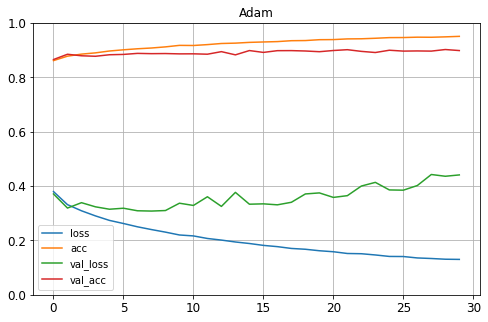

In [49]:
pd.DataFrame(history1.history).plot(figsize=(8, 5),title=('Adam'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
Adam = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 111us/sample - loss: 0.4687 - acc: 0.8898


In [51]:
Adam

[0.46868690507113936, 0.8898]

In [52]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

In [53]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 18s 327us/sample - loss: 0.1286 - acc: 0.9530 - val_loss: 0.5466 - val_acc: 0.9046
Epoch 2/30
55000/55000 [==============================] - 16s 300us/sample - loss: 0.1386 - acc: 0.9500 - val_loss: 0.6473 - val_acc: 0.8988
Epoch 3/30
55000/55000 [==============================] - 22s 395us/sample - loss: 0.1473 - acc: 0.9489 - val_loss: 0.7202 - val_acc: 0.8948
Epoch 4/30
55000/55000 [==============================] - 32s 575us/sample - loss: 0.1545 - acc: 0.9473 - val_loss: 0.7740 - val_acc: 0.8908
Epoch 5/30
55000/55000 [==============================] - 24s 430us/sample - loss: 0.1552 - acc: 0.9468 - val_loss: 0.7349 - val_acc: 0.8954
Epoch 6/30
55000/55000 [==============================] - 23s 413us/sample - loss: 0.1617 - acc: 0.9473 - val_loss: 0.7641 - val_acc: 0.8964
Epoch 7/30
55000/55000 [==============================] - 22s 401us/sample - loss: 0.1648 - acc: 0.9451 -

In [54]:
history2.params

{'batch_size': 32,
 'epochs': 30,
 'steps': None,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [55]:
print(history2.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [56]:
history2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

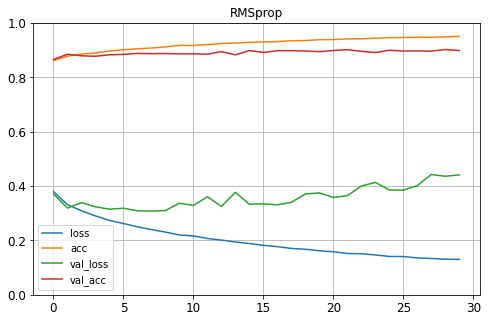

In [57]:
pd.DataFrame(history1.history).plot(figsize=(8, 5),title=('RMSprop'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [58]:
RMSprop = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 126us/sample - loss: 1.3321 - acc: 0.8775


In [59]:
RMSprop

[1.332091798067093, 0.8775]

### Question 2 :

In [60]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [61]:
history2 = model.fit(X_train, y_train, batch_size=70, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 50s 906us/sample - loss: 3.2540 - acc: 0.2063 - val_loss: 1.9395 - val_acc: 0.2510
Epoch 2/30
55000/55000 [==============================] - 39s 704us/sample - loss: 1.8515 - acc: 0.2859 - val_loss: 1.9542 - val_acc: 0.2356
Epoch 3/30
55000/55000 [==============================] - 53s 959us/sample - loss: 1.8192 - acc: 0.3089 - val_loss: 1.4112 - val_acc: 0.4252
Epoch 4/30
55000/55000 [==============================] - 45s 811us/sample - loss: 1.5224 - acc: 0.3903 - val_loss: 1.4545 - val_acc: 0.4096
Epoch 5/30
55000/55000 [==============================] - 42s 772us/sample - loss: 1.3067 - acc: 0.4502 - val_loss: 1.4039 - val_acc: 0.4522
Epoch 6/30
55000/55000 [==============================] - 38s 682us/sample - loss: 1.1111 - acc: 0.5434 - val_loss: 1.0045 - val_acc: 0.5714
Epoch 7/30
55000/55000 [==============================] - 45s 811us/sample - loss: 0.9884 - acc: 0.5854 -

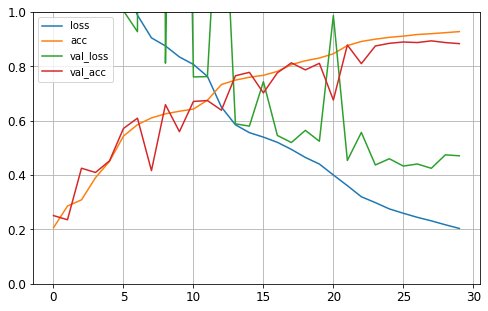

In [62]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [63]:
history3 = model.fit(X_train, y_train, batch_size=7000, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.1831 - acc: 0.9328 - val_loss: 0.4508 - val_acc: 0.8926
Epoch 2/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.1698 - acc: 0.9388 - val_loss: 0.4474 - val_acc: 0.8936
Epoch 3/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.1664 - acc: 0.9409 - val_loss: 0.4471 - val_acc: 0.8944
Epoch 4/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.1651 - acc: 0.9415 - val_loss: 0.4471 - val_acc: 0.8948
Epoch 5/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.1644 - acc: 0.9418 - val_loss: 0.4471 - val_acc: 0.8950
Epoch 6/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.1639 - acc: 0.9420 - val_loss: 0.4472 - val_acc: 0.8954
Epoch 7/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.1635 - acc: 0.9420 - val_loss: 0.4

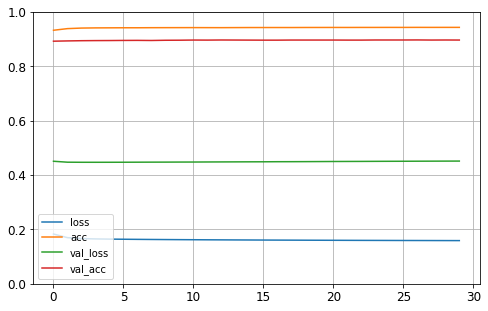

In [64]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Question 3 :

In [65]:
history4 = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 14s 258us/sample - loss: 0.1636 - acc: 0.9417 - val_loss: 0.4690 - val_acc: 0.8898
Epoch 2/10
55000/55000 [==============================] - 18s 318us/sample - loss: 0.1603 - acc: 0.9425 - val_loss: 0.4672 - val_acc: 0.8966
Epoch 3/10
55000/55000 [==============================] - 17s 311us/sample - loss: 0.1581 - acc: 0.9436 - val_loss: 0.4759 - val_acc: 0.8940
Epoch 4/10
55000/55000 [==============================] - 16s 293us/sample - loss: 0.1560 - acc: 0.9441 - val_loss: 0.4867 - val_acc: 0.8910
Epoch 5/10
55000/55000 [==============================] - 11s 205us/sample - loss: 0.1546 - acc: 0.9446 - val_loss: 0.4854 - val_acc: 0.8940
Epoch 6/10
55000/55000 [==============================] - 14s 253us/sample - loss: 0.1526 - acc: 0.9451 - val_loss: 0.4759 - val_acc: 0.8948
Epoch 7/10
55000/55000 [==============================] - 13s 232us/sample - loss: 0.1515 - acc: 0.9456 -

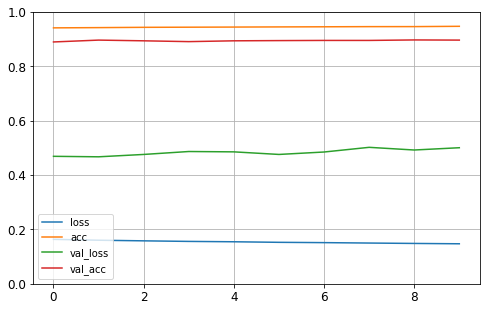

In [66]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [67]:
history5 = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 14s 259us/sample - loss: 0.1461 - acc: 0.9470 - val_loss: 0.5030 - val_acc: 0.8966
Epoch 2/10
55000/55000 [==============================] - 13s 238us/sample - loss: 0.1442 - acc: 0.9479 - val_loss: 0.5514 - val_acc: 0.8874
Epoch 3/10
55000/55000 [==============================] - 14s 257us/sample - loss: 0.1435 - acc: 0.9484 - val_loss: 0.5048 - val_acc: 0.8914
Epoch 4/10
55000/55000 [==============================] - 12s 220us/sample - loss: 0.1425 - acc: 0.9487 - val_loss: 0.5295 - val_acc: 0.8928
Epoch 5/10
55000/55000 [==============================] - 16s 294us/sample - loss: 0.1412 - acc: 0.9495 - val_loss: 0.5163 - val_acc: 0.8930
Epoch 6/10
55000/55000 [==============================] - 15s 267us/sample - loss: 0.1398 - acc: 0.9500 - val_loss: 0.5289 - val_acc: 0.8906
Epoch 7/10
55000/55000 [==============================] - 14s 252us/sample - loss: 0.1389 - acc: 0.9502 -

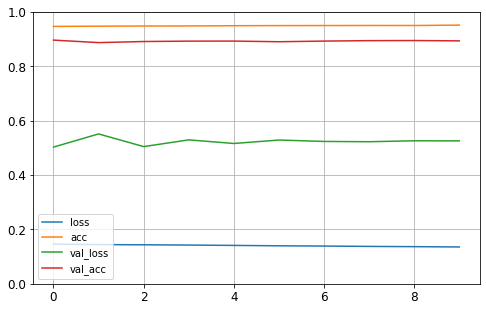

In [68]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Question 4 : 

In [81]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add((keras.layers.Dropout(0.2)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [82]:
model.layers

In [83]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

In [84]:
history6 = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 42s 772us/sample - loss: 0.5404 - acc: 0.8061 - val_loss: 0.3973 - val_acc: 0.8582
Epoch 2/30
55000/55000 [==============================] - 38s 694us/sample - loss: 0.4430 - acc: 0.8467 - val_loss: 0.3969 - val_acc: 0.8666
Epoch 3/30
55000/55000 [==============================] - 37s 664us/sample - loss: 0.4278 - acc: 0.8563 - val_loss: 0.4284 - val_acc: 0.8628
Epoch 4/30
55000/55000 [==============================] - 35s 640us/sample - loss: 0.4175 - acc: 0.8605 - val_loss: 0.3790 - val_acc: 0.8790
Epoch 5/30
55000/55000 [==============================] - 27s 487us/sample - loss: 0.4091 - acc: 0.8666 - val_loss: 0.4207 - val_acc: 0.8788
Epoch 6/30
55000/55000 [==============================] - 38s 682us/sample - loss: 0.4006 - acc: 0.8694 - val_loss: 0.4324 - val_acc: 0.8522
Epoch 7/30
55000/55000 [==============================] - 29s 519us/sample - loss: 0.3969 - acc: 0.8733 -

In [85]:
RMSprop = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 186us/sample - loss: 0.6774 - acc: 0.8709


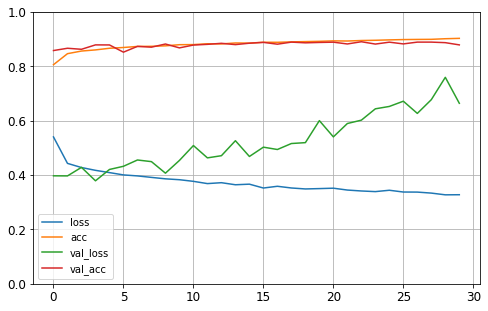

In [86]:
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()